In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt('hw1data.dat')
data[data[:, 2] == -1, 2] = 0
data

array([[0.73662472, 0.50544176, 0.        ],
       [0.71066494, 0.56503663, 0.        ],
       [0.10533493, 0.06889585, 1.        ],
       ...,
       [0.15670748, 0.93967311, 1.        ],
       [0.73948357, 0.71284126, 1.        ],
       [0.6317367 , 0.93890702, 0.        ]])

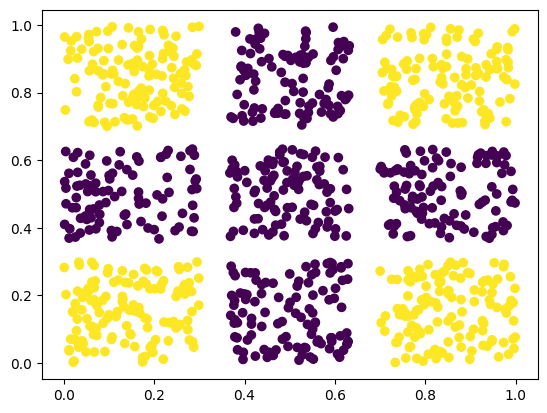

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.show()

In [ ]:
tf.random.set_seed(99)
np.random.seed(99)

class DataLoader:
    def __init__(self, path='hw1data.dat', batch_size=32):
        self.path = path
        self.batch_size = batch_size
        self.data = self.load_data()

    def load_data(self):
        """Load and process the dataset."""
        data = np.loadtxt(self.path)
        X, y = data[:, :-1], data[:, -1]
        y = (y + 1) / 2  # Convert -1/1 to 0/1
        return X, y

    def get_data(self):
        """Create TensorFlow dataset."""
        X, y = self.data
        dataset = tf.data.Dataset.from_tensor_slices((X, y))
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.experimental.AUTOTUNE)
        return dataset

class Model:
    def __init__(self, dims=[2, 5, 1]):
        self.dims = dims

    def ANN(self, activation):
        initializer = tf.keras.initializers.GlorotUniform(seed=99)
        bias_initializer = tf.keras.initializers.Zeros()
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(self.dims[1], activation=activation, kernel_initializer=initializer,
                                  bias_initializer=bias_initializer, input_shape=(self.dims[0],)),
            tf.keras.layers.Dense(self.dims[2], activation='sigmoid', kernel_initializer=initializer,
                                  bias_initializer=bias_initializer)
        ])
        return model

class Trainer:
    def __init__(self, model, data_loader, optimizer_name, activation,
                 momentum=0.1, epsilon=1e-6, learning_rate=0.01,
                 beta_1=0.9, beta_2=0.999, patience=50, min_delta=1e-3,name=""):

        self.model = model
        self.data_loader = data_loader
        self.activation = activation
        self.patience = patience
        self.min_delta = min_delta
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.optimizer_name = optimizer_name
        self.name = name
        if optimizer_name == 'SGD':
            self.optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        elif optimizer_name == 'Adam':
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
        elif optimizer_name == 'RMSprop':
            self.optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, epsilon=epsilon)
        else:
            raise ValueError("Invalid optimizer name")

    def train(self, epochs=50000):
        train_dataset = self.data_loader.get_data()

        self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='loss', patience=self.patience, min_delta=1e-3, restore_best_weights=True, verbose=1)

        history = self.model.fit(train_dataset, epochs=epochs, callbacks=[early_stop], verbose=0)
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss Curve")
        plt.savefig(f'loss curve of {self.name}.png')
        plt.legend()
        plt.show()

        best_epoch = len(history.history['loss'])
        best_accuracy = max(history.history['accuracy'])

        return best_epoch, best_accuracy

    def predict(self, input_data):
        probabilities = self.model.predict(input_data)
        return (probabilities >= 0.5).astype(int)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1952: early stopping
Restoring model weights from the end of the best epoch: 1902.


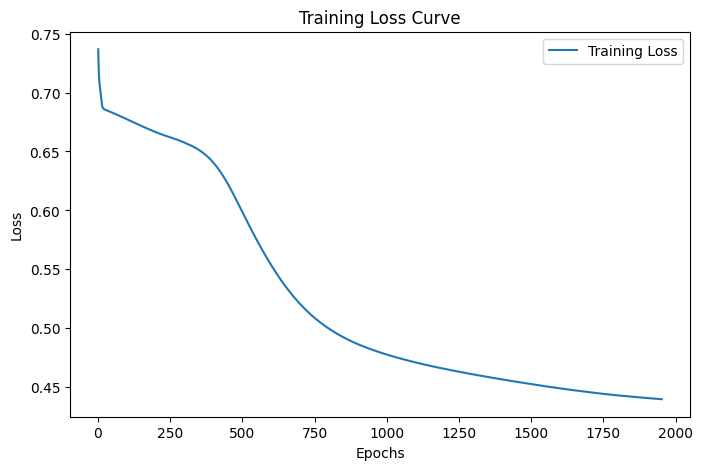

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Optimizer: SGD, Activation: relu, Momentum: 0.0, Accuracy: 0.800000011920929, Predictions: 1
Epoch 1818: early stopping
Restoring model weights from the end of the best epoch: 1768.


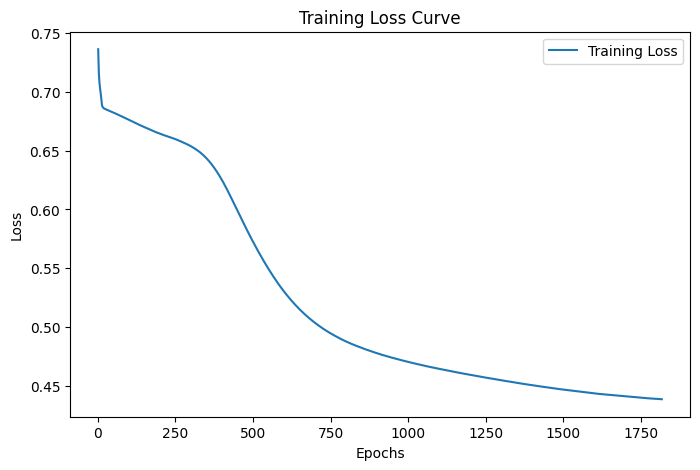

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Optimizer: SGD, Activation: relu, Momentum: 0.1, Accuracy: 0.8019999861717224, Predictions: 1
Epoch 1264: early stopping
Restoring model weights from the end of the best epoch: 1214.


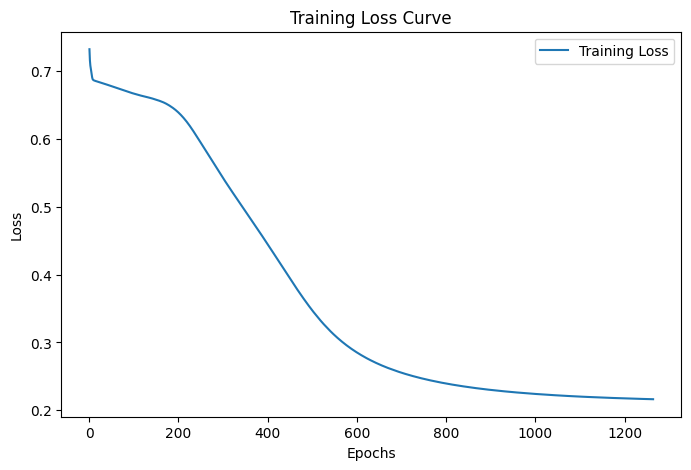

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Optimizer: SGD, Activation: relu, Momentum: 0.5, Accuracy: 0.8939999938011169, Predictions: 1
Epoch 379: early stopping
Restoring model weights from the end of the best epoch: 329.


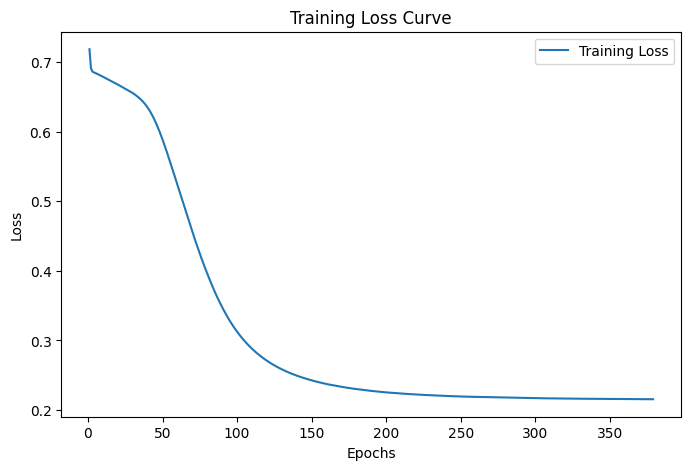

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Optimizer: SGD, Activation: relu, Momentum: 0.9, Accuracy: 0.8920000195503235, Predictions: 1
Epoch 190: early stopping
Restoring model weights from the end of the best epoch: 140.


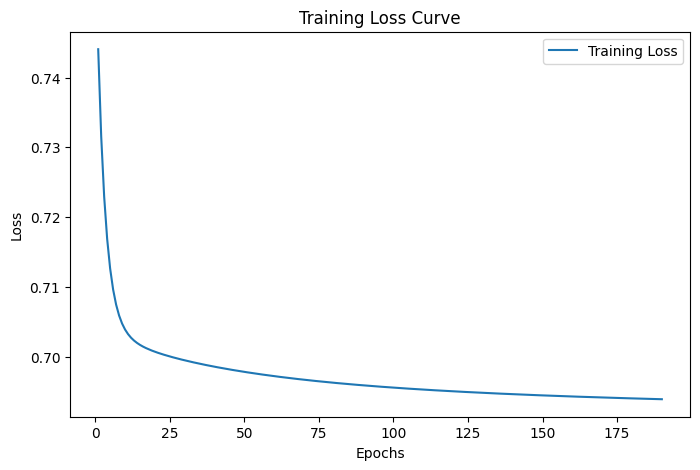

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Optimizer: SGD, Activation: tanh, Momentum: 0.0, Accuracy: 0.5600000023841858, Predictions: 1
Epoch 185: early stopping
Restoring model weights from the end of the best epoch: 135.


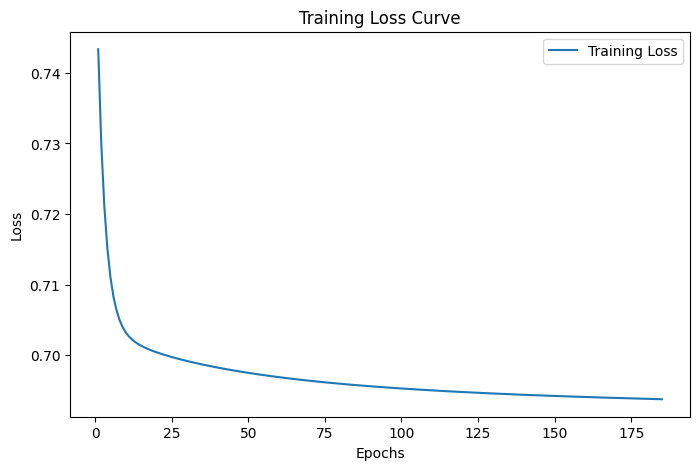

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Optimizer: SGD, Activation: tanh, Momentum: 0.1, Accuracy: 0.5590000152587891, Predictions: 1
Epoch 134: early stopping
Restoring model weights from the end of the best epoch: 84.


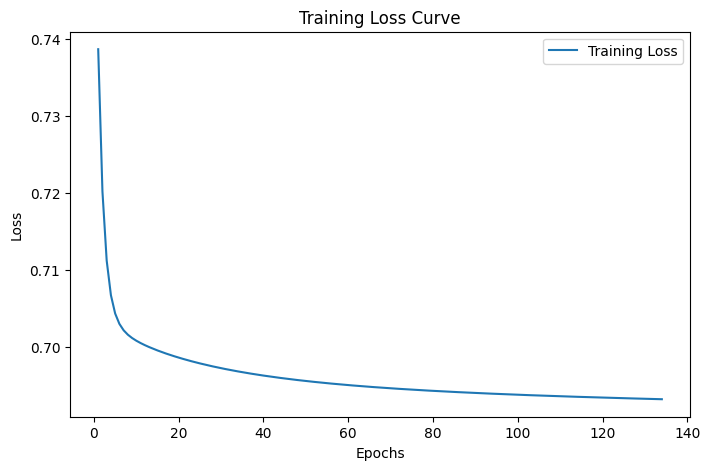

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Optimizer: SGD, Activation: tanh, Momentum: 0.5, Accuracy: 0.5600000023841858, Predictions: 1
Epoch 751: early stopping
Restoring model weights from the end of the best epoch: 701.


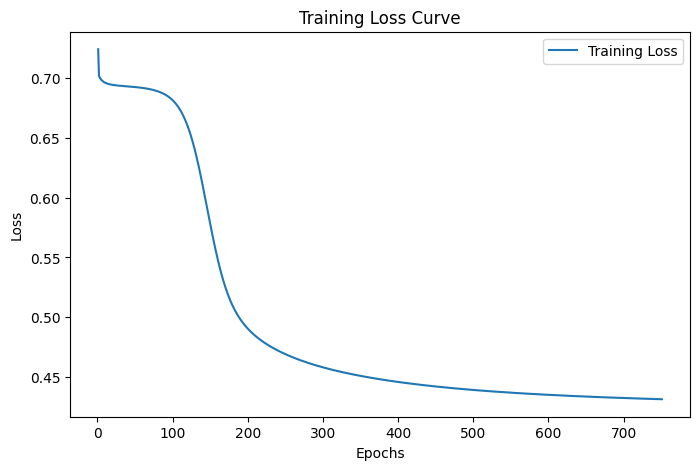

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Optimizer: SGD, Activation: tanh, Momentum: 0.9, Accuracy: 0.7820000052452087, Predictions: 1
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 13.


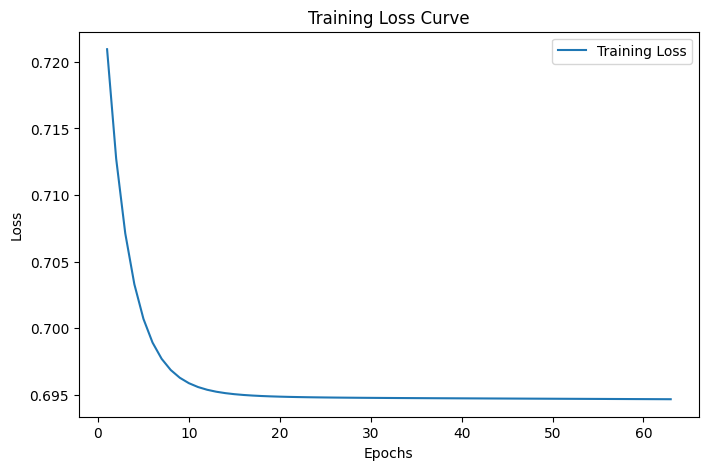

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Optimizer: SGD, Activation: sigmoid, Momentum: 0.0, Accuracy: 0.5189999938011169, Predictions: 1
Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 17.


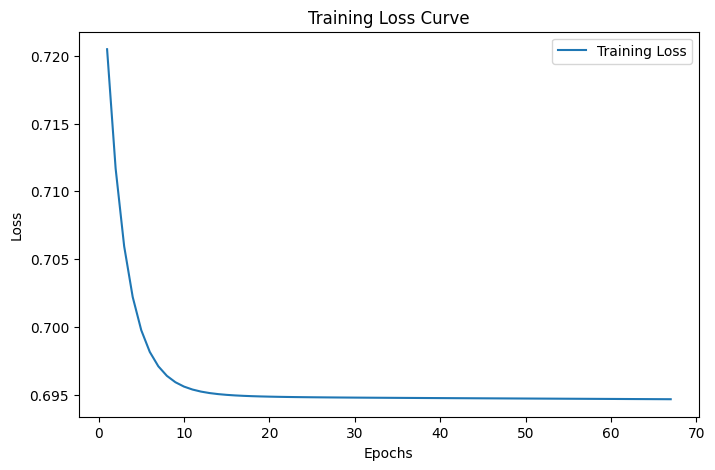

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Optimizer: SGD, Activation: sigmoid, Momentum: 0.1, Accuracy: 0.5180000066757202, Predictions: 1
Epoch 58: early stopping
Restoring model weights from the end of the best epoch: 8.


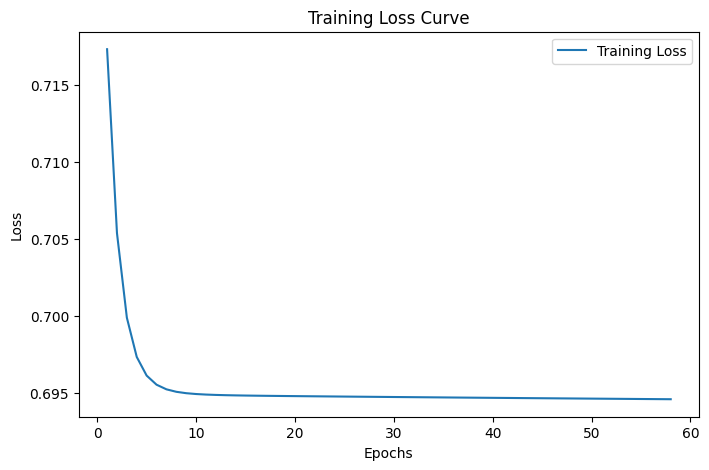

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Optimizer: SGD, Activation: sigmoid, Momentum: 0.5, Accuracy: 0.5090000033378601, Predictions: 1
Epoch 52: early stopping
Restoring model weights from the end of the best epoch: 2.


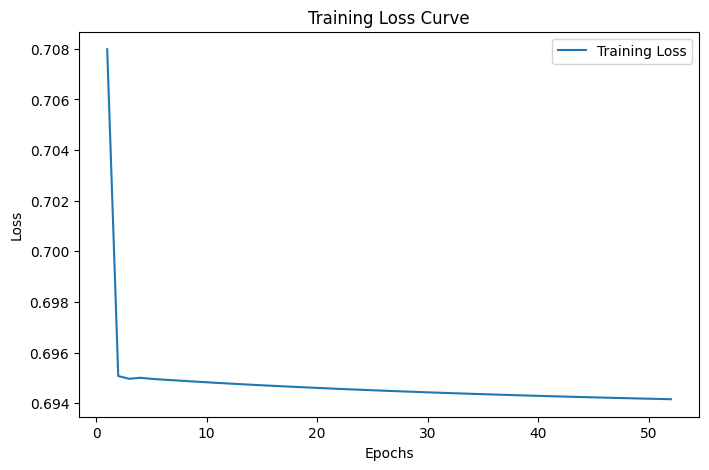

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Optimizer: SGD, Activation: sigmoid, Momentum: 0.9, Accuracy: 0.6000000238418579, Predictions: 1
Epoch 5478: early stopping
Restoring model weights from the end of the best epoch: 5428.


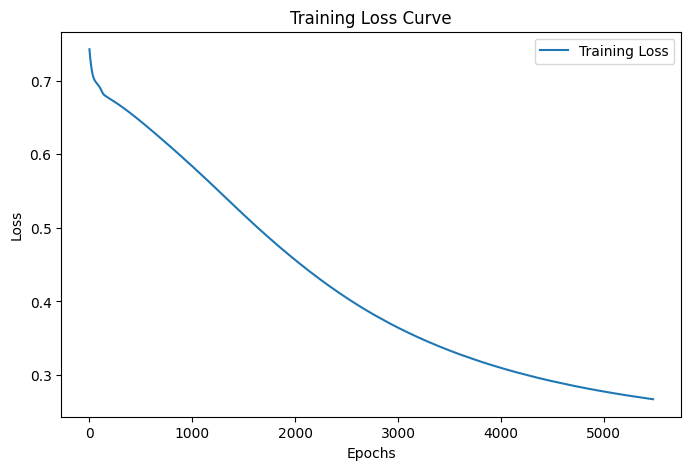

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Optimizer: RMSprop, Activation: relu, Learning Rate: 0.0001, Accuracy: 0.8930000066757202, Predictions: 1
Epoch 1329: early stopping
Restoring model weights from the end of the best epoch: 1279.


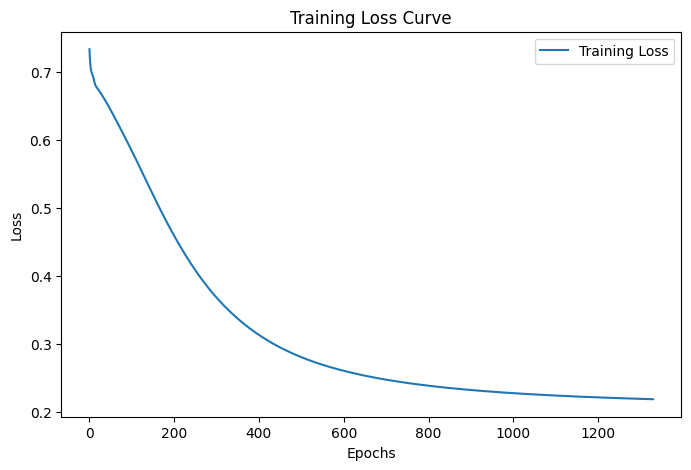

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Optimizer: RMSprop, Activation: relu, Learning Rate: 0.001, Accuracy: 0.8939999938011169, Predictions: 1
Epoch 299: early stopping
Restoring model weights from the end of the best epoch: 249.


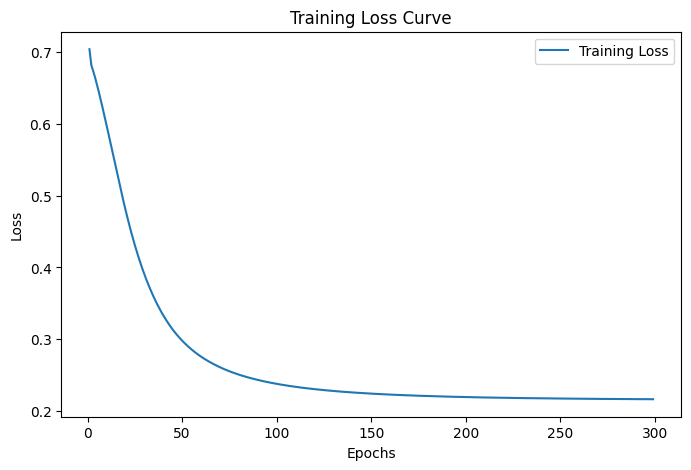

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Optimizer: RMSprop, Activation: relu, Learning Rate: 0.01, Accuracy: 0.8989999890327454, Predictions: 1
Epoch 248: early stopping
Restoring model weights from the end of the best epoch: 198.


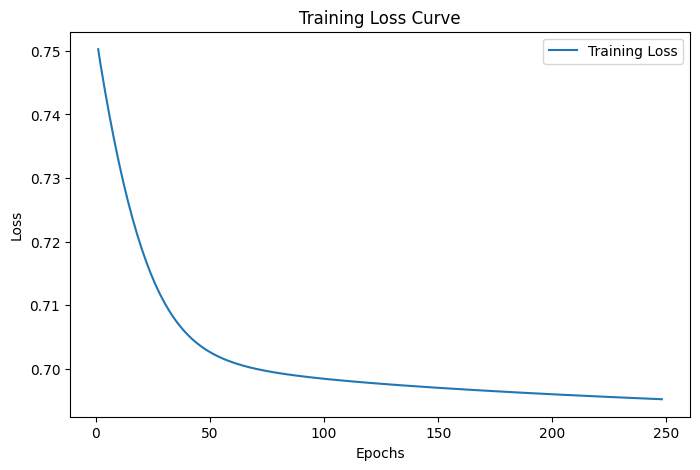

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Optimizer: RMSprop, Activation: tanh, Learning Rate: 0.0001, Accuracy: 0.6110000014305115, Predictions: 1
Epoch 1252: early stopping
Restoring model weights from the end of the best epoch: 1202.


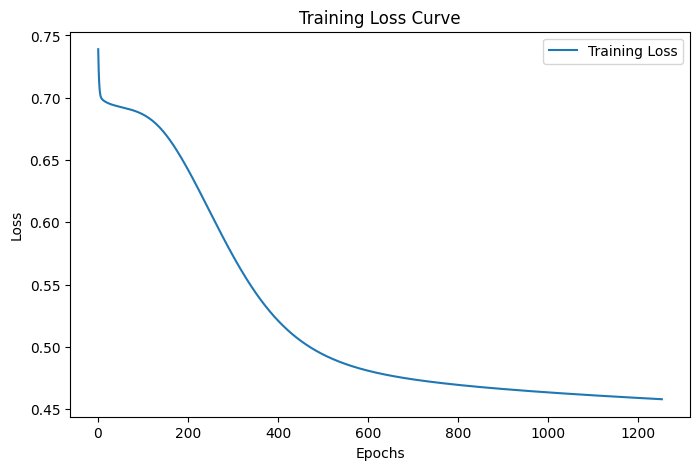

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Optimizer: RMSprop, Activation: tanh, Learning Rate: 0.001, Accuracy: 0.7749999761581421, Predictions: 1
Epoch 1012: early stopping
Restoring model weights from the end of the best epoch: 962.


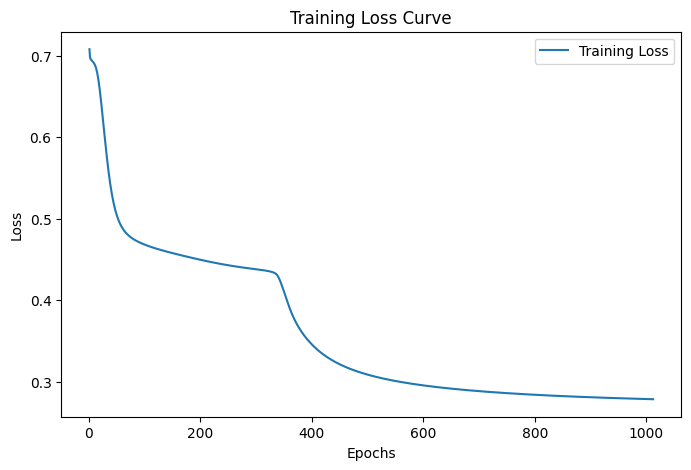

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Optimizer: RMSprop, Activation: tanh, Learning Rate: 0.01, Accuracy: 0.871999979019165, Predictions: 1
Epoch 114: early stopping
Restoring model weights from the end of the best epoch: 64.


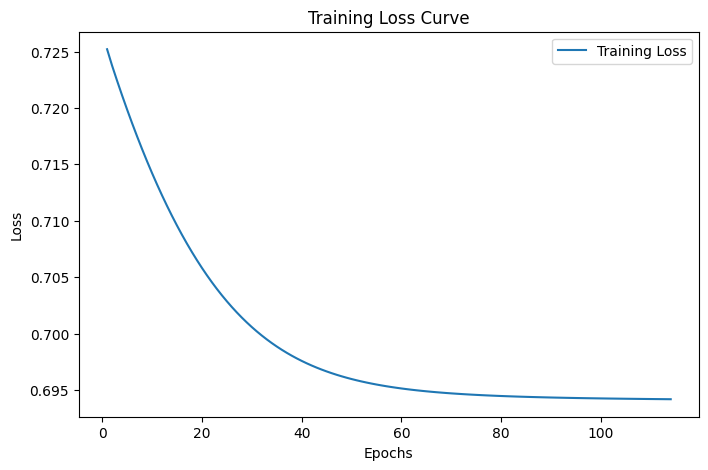

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Optimizer: RMSprop, Activation: sigmoid, Learning Rate: 0.0001, Accuracy: 0.5210000276565552, Predictions: 1
Epoch 59: early stopping
Restoring model weights from the end of the best epoch: 9.


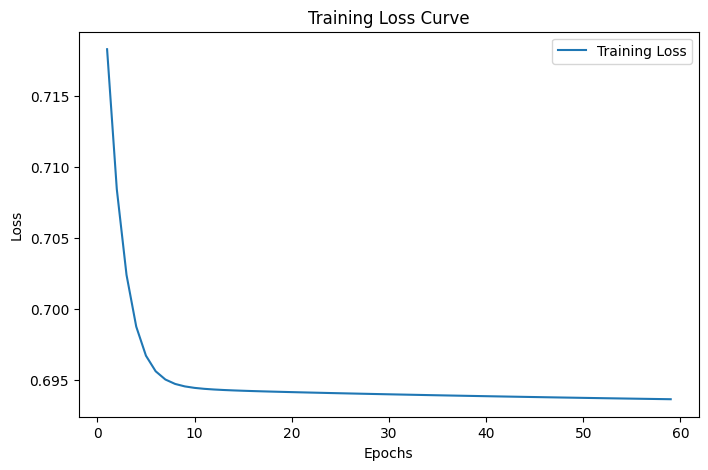

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Optimizer: RMSprop, Activation: sigmoid, Learning Rate: 0.001, Accuracy: 0.5910000205039978, Predictions: 1
Epoch 826: early stopping
Restoring model weights from the end of the best epoch: 776.


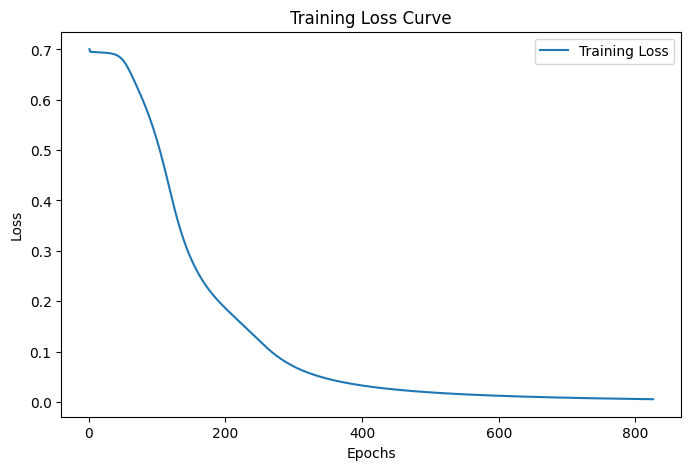

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Optimizer: RMSprop, Activation: sigmoid, Learning Rate: 0.01, Accuracy: 1.0, Predictions: 1
Epoch 310: early stopping
Restoring model weights from the end of the best epoch: 260.


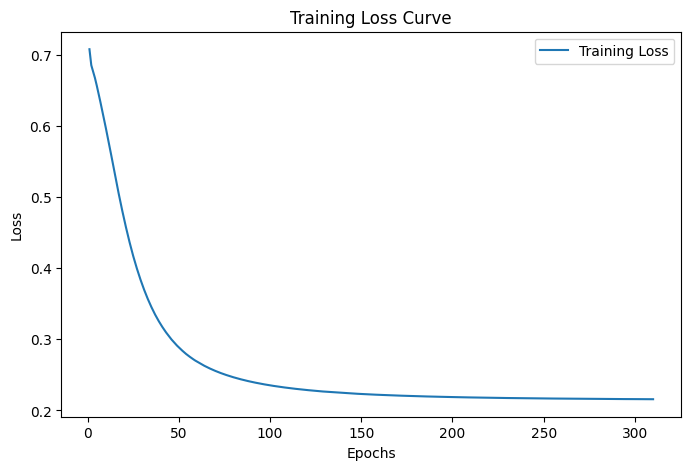

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Optimizer: Adam, Activation: relu, Beta 1: 0.85, Beta 2: 0.95, Accuracy: 0.8970000147819519, Predictions: 1
Epoch 295: early stopping
Restoring model weights from the end of the best epoch: 245.


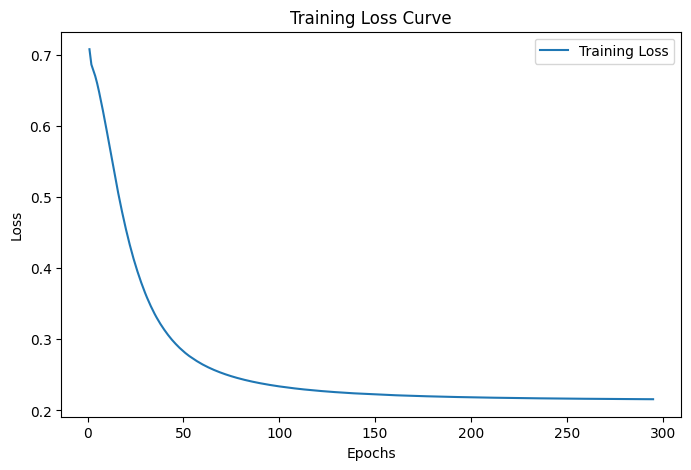

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Optimizer: Adam, Activation: relu, Beta 1: 0.85, Beta 2: 0.99, Accuracy: 0.8949999809265137, Predictions: 1
Epoch 319: early stopping
Restoring model weights from the end of the best epoch: 269.


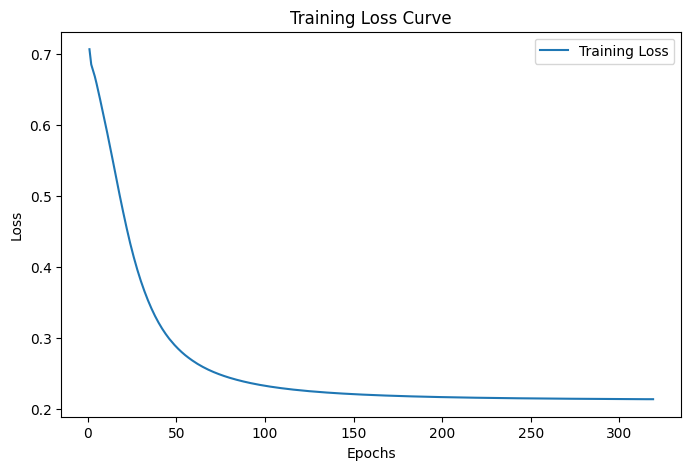

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Optimizer: Adam, Activation: relu, Beta 1: 0.9, Beta 2: 0.95, Accuracy: 0.8949999809265137, Predictions: 1
Epoch 314: early stopping
Restoring model weights from the end of the best epoch: 264.


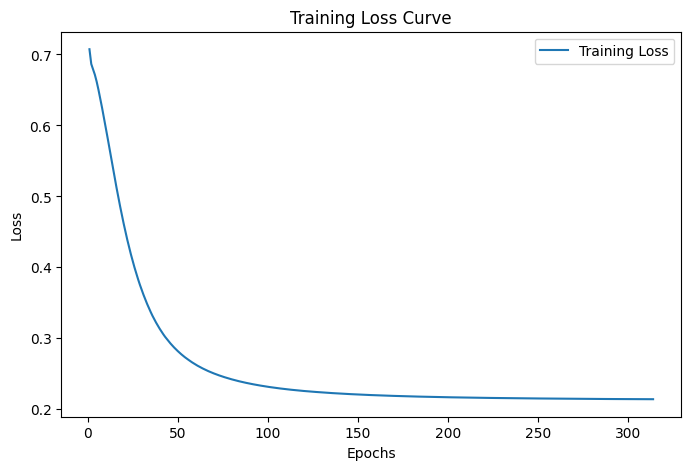

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Optimizer: Adam, Activation: relu, Beta 1: 0.9, Beta 2: 0.99, Accuracy: 0.8960000276565552, Predictions: 1
Epoch 931: early stopping
Restoring model weights from the end of the best epoch: 881.


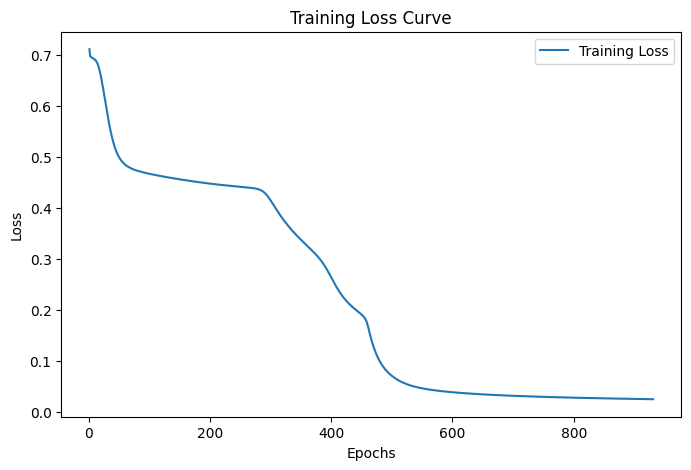

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Optimizer: Adam, Activation: tanh, Beta 1: 0.85, Beta 2: 0.95, Accuracy: 0.9929999709129333, Predictions: 1
Epoch 887: early stopping
Restoring model weights from the end of the best epoch: 837.


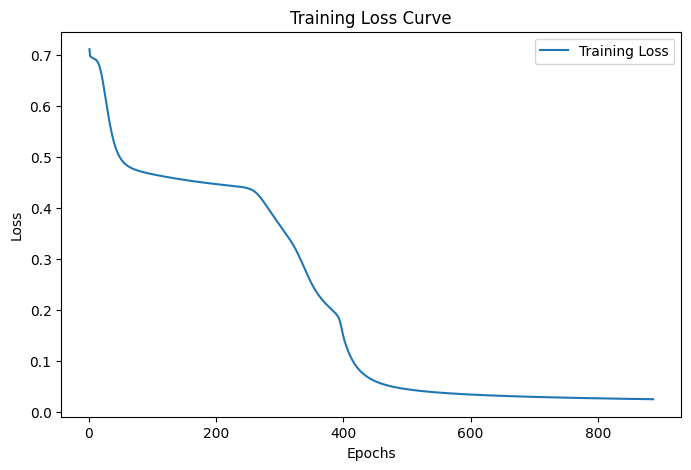

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Optimizer: Adam, Activation: tanh, Beta 1: 0.85, Beta 2: 0.99, Accuracy: 0.9940000176429749, Predictions: 1
Epoch 1438: early stopping
Restoring model weights from the end of the best epoch: 1388.


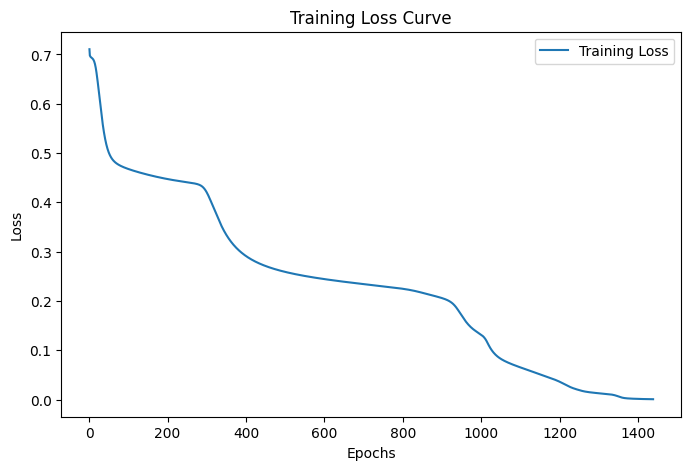

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Optimizer: Adam, Activation: tanh, Beta 1: 0.9, Beta 2: 0.95, Accuracy: 1.0, Predictions: 1
Epoch 910: early stopping
Restoring model weights from the end of the best epoch: 860.


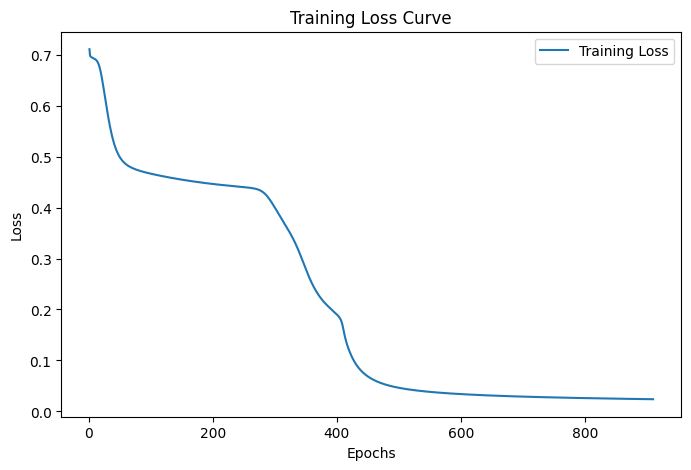

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Optimizer: Adam, Activation: tanh, Beta 1: 0.9, Beta 2: 0.99, Accuracy: 0.9940000176429749, Predictions: 1
Epoch 727: early stopping
Restoring model weights from the end of the best epoch: 677.


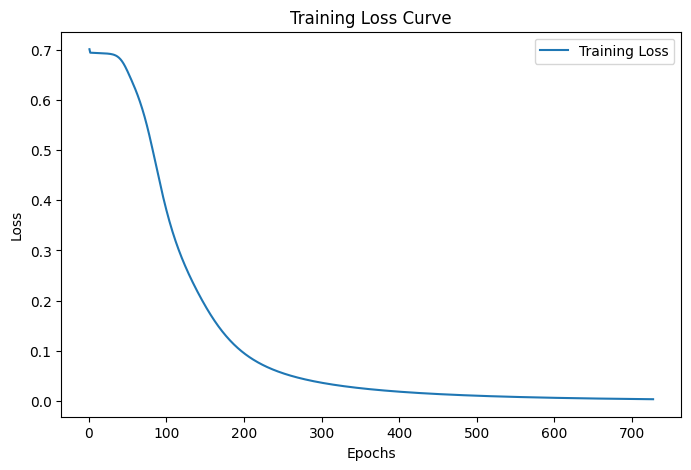

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Optimizer: Adam, Activation: sigmoid, Beta 1: 0.85, Beta 2: 0.95, Accuracy: 1.0, Predictions: 1
Epoch 746: early stopping
Restoring model weights from the end of the best epoch: 696.


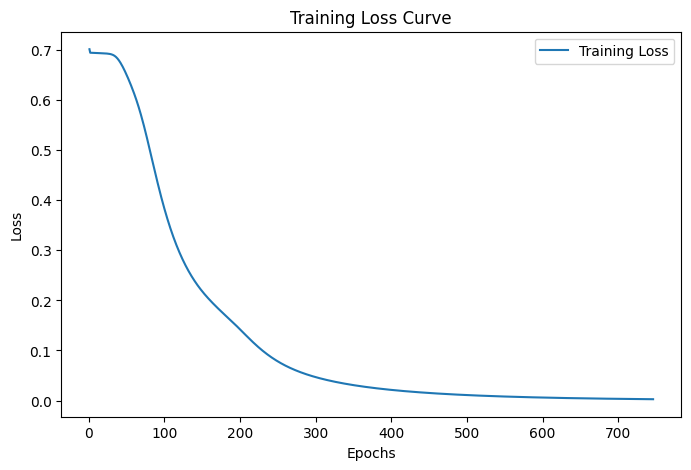

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Optimizer: Adam, Activation: sigmoid, Beta 1: 0.85, Beta 2: 0.99, Accuracy: 1.0, Predictions: 1
Epoch 730: early stopping
Restoring model weights from the end of the best epoch: 680.


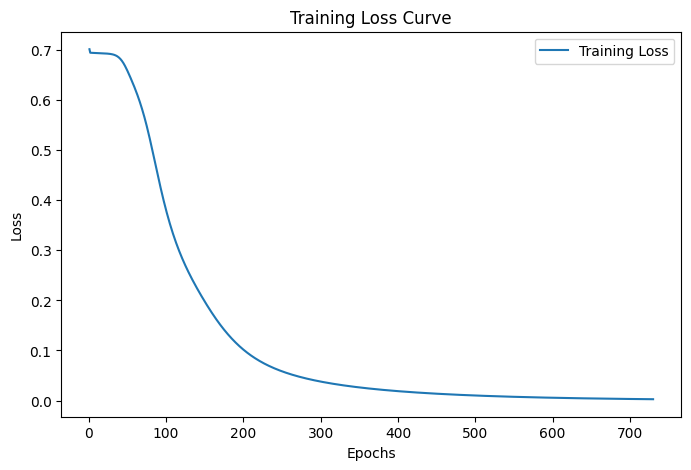

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Optimizer: Adam, Activation: sigmoid, Beta 1: 0.9, Beta 2: 0.95, Accuracy: 1.0, Predictions: 1
Epoch 731: early stopping
Restoring model weights from the end of the best epoch: 681.


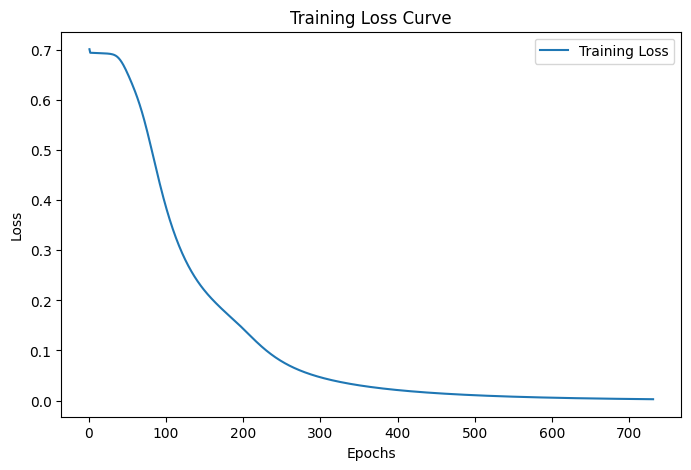

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Optimizer: Adam, Activation: sigmoid, Beta 1: 0.9, Beta 2: 0.99, Accuracy: 1.0, Predictions: 1


In [ ]:
optimizers = {
    'SGD': {'learning_rate': 0.01, 'momentum_values': [0.0, 0.1, 0.5, 0.9]},
    'RMSprop': {'learning_rates': [0.0001, 0.001, 0.01], 'epsilon': 1e-6},
    'Adam': {'beta_1_values': [0.85, 0.9], 'beta_2_values': [0.95, 0.99]}
}

activation_functions = ['relu', 'tanh', 'sigmoid']

results = []

for optimizer, params in optimizers.items():
    for activation in activation_functions:

        if optimizer == 'SGD':
            for momentum in params['momentum_values']:
                name = f"Optimizer: {optimizer};Activation: {activation};Momentum{momentum}"
                model_instance = Model()
                model = model_instance.ANN(activation)
                trainer = Trainer(model, DataLoader('hw1data.dat'), optimizer, activation,
                                  momentum=momentum, learning_rate=params['learning_rate'],name=name)
                epochs, accuracy = trainer.train()

                prediction = trainer.predict(np.array([[0.8, 0.2]]))[0][0]
                momentum_name = f'Momentum: {momentum}'
                print(f"Optimizer: {optimizer}, Activation: {activation}, Momentum: {momentum}, Accuracy: {accuracy}, Predictions: {prediction}")
                results.append((optimizer, activation, momentum_name, epochs, accuracy, prediction))

        elif optimizer == 'RMSprop':
            for lr in params['learning_rates']:
                name = f"Optimizer: {optimizer};Activation: {activation};Learning Rate{lr}"
                model_instance = Model()
                model = model_instance.ANN(activation)
                trainer = Trainer(model, DataLoader('hw1data.dat'), optimizer, activation,
                                  learning_rate=lr, epsilon=params['epsilon'], name=name)
                epochs, accuracy = trainer.train()
                lr_name = f'Learning Rate: {lr}'
                prediction = trainer.predict(np.array([[0.8, 0.2]]))[0][0]
                print(f"Optimizer: {optimizer}, Activation: {activation}, Learning Rate: {lr}, Accuracy: {accuracy}, Predictions: {prediction}")
                results.append((optimizer, activation, lr_name, epochs, accuracy, prediction))

        elif optimizer == 'Adam':
            for beta_1 in params['beta_1_values']:
                for beta_2 in params['beta_2_values']:
                    name = f"Optimizer: {optimizer};Activation: {activation};Beta 1{beta_1};Beta 2{beta_2}"
                    model_instance = Model()
                    model = model_instance.ANN(activation)
                    trainer = Trainer(model, DataLoader('hw1data.dat'), optimizer, activation,
                                      beta_1=beta_1, beta_2=beta_2, name=name)
                    epochs, accuracy = trainer.train()
                    beta_1_name = f'Beta 1: {beta_1}'
                    beta_2_name = f'Beta 2: {beta_2}'
                    prediction = trainer.predict(np.array([[0.8, 0.2]]))[0][0]
                    print(f"Optimizer: {optimizer}, Activation: {activation}, Beta 1: {beta_1}, Beta 2: {beta_2}, Accuracy: {accuracy}, Predictions: {prediction}")
                    results.append((optimizer, activation, (beta_1_name, beta_2_name), epochs, accuracy, prediction))

df = pd.DataFrame(results, columns=['Optimizer', 'Activation Function', 'Hyperparameter',
                                    'Required Epochs', 'Training Accuracy (%)', 'Prediction for [0.8, 0.2]'])



In [ ]:
df

,Optimizer,Activation Function,Hyperparameter,Required Epochs,Training Accuracy (%),"Prediction for [0.8, 0.2]"
0,SGD,relu,Momentum: 0.0,1952,0.800,1
1,SGD,relu,Momentum: 0.1,1818,0.802,1
2,SGD,relu,Momentum: 0.5,1264,0.894,1
3,SGD,relu,Momentum: 0.9,379,0.892,1
4,SGD,tanh,Momentum: 0.0,190,0.560,1
5,SGD,tanh,Momentum: 0.1,185,0.559,1
6,SGD,tanh,Momentum: 0.5,134,0.560,1
7,SGD,tanh,Momentum: 0.9,751,0.782,1
8,SGD,sigmoid,Momentum: 0.0,63,0.519,1
9,SGD,sigmoid,Momentum: 0.1,67,0.518,1


In [ ]:
df.to_csv('results.csv', index=False)

Step 1: w = [1. 3.]
Step 2: w = [ 2. -1.]
Step 3: w = [3. 2.]
Step 4: w = [ 4. -2.]
Step 5: w = [5. 1.]

Final w: w = [5. 1.]
Total updates: 5


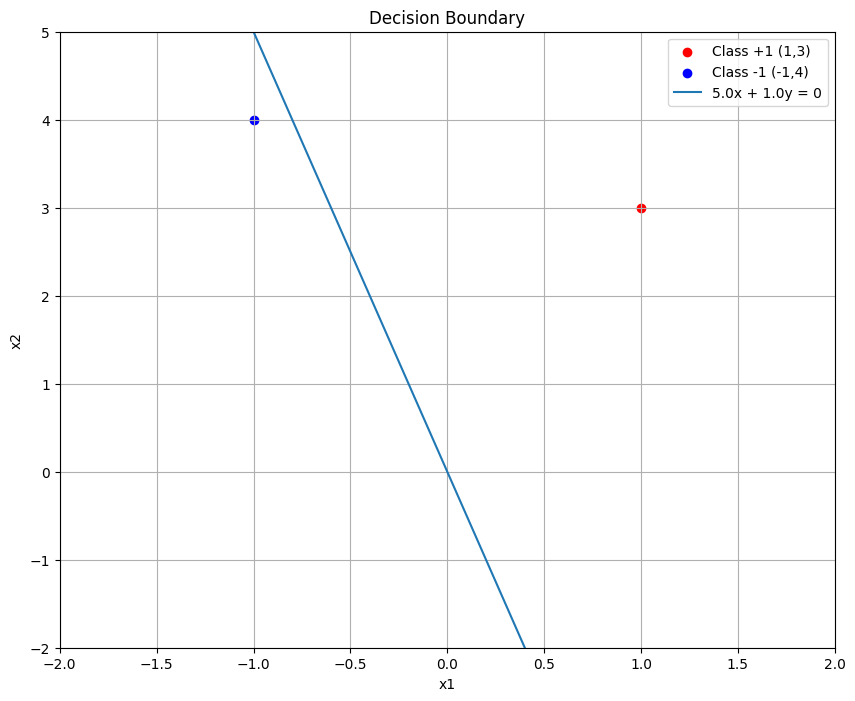

In [ ]:
X = np.array([[1, 3], [-1, 4]])
Y = np.array([1, -1])
w = np.zeros(2)
s = 0
w_sequence = []

flag = False
while not flag:
    flag = True
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        if y * np.dot(w, x) <= 0:
            if y > 0:
              w = w + x
            else:
              w = w - x
            s += 1
            w_sequence.append(w.copy())
            flag = False
for idx, weights in enumerate(w_sequence, 1):
    print(f"Step {idx}: w = {weights}")

print(f"\nFinal w: w = {w}")
print(f"Total updates: {s}")

plt.figure(figsize=(10, 8))

plt.scatter(data[0, 0], data[0, 1], c='red', label='Class +1 (1,3)')
plt.scatter(data[1, 0], data[1, 1], c='blue', label='Class -1 (-1,4)')

x_boundary = np.linspace(-1, 1, 100)

y_boundary = (-w[0]/w[1]) * x_boundary
boundary_label = f'{w[0]}x + {w[1]}y = 0'

plt.plot(x_boundary, y_boundary, label=boundary_label)

plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-2, 2)
plt.ylim(-2, 5)
plt.grid(True)
plt.legend()
plt.show()